In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Loading

In [2]:
classes = np.loadtxt('./data/classes.txt', dtype=str)
class_dict = {i+1:x for i, x in enumerate(classes)}
columns = ["CLASS", "TITLE", "DESCRIPTION"]
ag_new_train = pd.read_csv('./data/train.csv', header=None)
ag_new_train.columns = columns
ag_new_train.head()

,CLASS,TITLE,DESCRIPTION
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [3]:
train_df = pd.DataFrame(data=ag_new_train["TITLE"] + " " + ag_new_train["DESCRIPTION"], columns=["POST"])
train_df["LABEL"] = ag_new_train["CLASS"].map(class_dict)

In [4]:
train_df.head()

,POST,LABEL
0,Wall St. Bears Claw Back Into the Black (Reute...,Business
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,Business
3,Iraq Halts Oil Exports from Main Southern Pipe...,Business
4,"Oil prices soar to all-time record, posing new...",Business


In [5]:
len(train_df)

120000

In [6]:
ag_new_test = pd.read_csv('./data/test.csv', header=None)
ag_new_test.columns = columns
ag_new_test.head()

,CLASS,TITLE,DESCRIPTION
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [7]:
test_df = pd.DataFrame(data=ag_new_test["TITLE"] + " " + ag_new_test["DESCRIPTION"], columns=["POST"])
test_df["LABEL"] = ag_new_test["CLASS"].map(class_dict)
test_df.head()

,POST,LABEL
0,Fears for T N pension after talks Unions repre...,Business
1,The Race is On: Second Private Team Sets Launc...,Sci/Tech
2,Ky. Company Wins Grant to Study Peptides (AP) ...,Sci/Tech
3,Prediction Unit Helps Forecast Wildfires (AP) ...,Sci/Tech
4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,Sci/Tech


In [8]:
len(test_df)

7600

# EDA

In [10]:
def print_sample(index=None, df=train_df, return_sample=False):
    if index is None:
        index = np.random.randint(len(df))
    example = df.values[index]
    print(example[0])
    print('Label:', example[1])
    if return_sample:
        return example[0]

In [11]:
print_sample()

Scientists Find Arctic Warming Quickly WASHINGTON - Scientists say changes in the earth #39;s climate from human influences are occurring particularly intensely in the Arctic region, evidenced by widespread melting of glaciers, thinning sea ice and rising permafrost temperatures.
Label: Sci/Tech


## plots

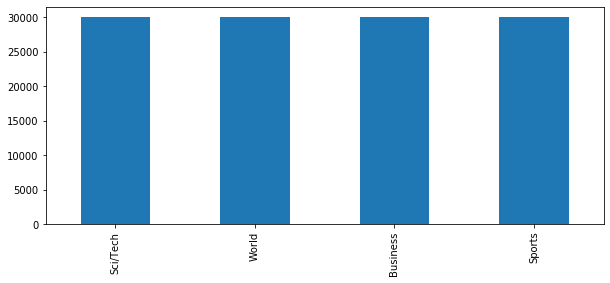

In [12]:
plt.figure(figsize=(10,4))
train_df["LABEL"].value_counts().plot(kind='bar');

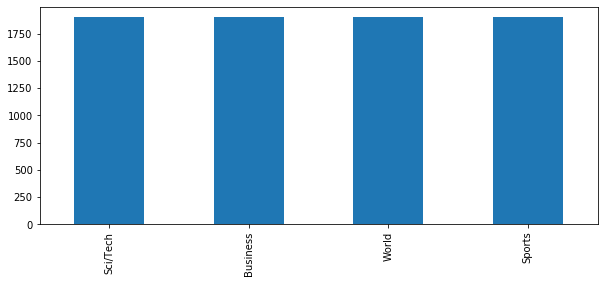

In [13]:
plt.figure(figsize=(10,4))
test_df["LABEL"].value_counts().plot(kind='bar');

In [14]:
pd.isnull(train_df['POST']).sum(), sum(train_df['POST'] == ""), sum(train_df['POST'] == " ")

(0, 0, 0)

In [15]:
train_df["POST_LENGTH"] = train_df["POST"].map(len)
train_df["POST_NUM_WORDS"] = train_df["POST"].map(lambda x: len(x.split()))

In [16]:
train_df.head()

,POST,LABEL,POST_LENGTH,POST_NUM_WORDS
0,Wall St. Bears Claw Back Into the Black (Reute...,Business,144,21
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Business,266,36
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,Business,232,36
3,Iraq Halts Oil Exports from Main Southern Pipe...,Business,256,36
4,"Oil prices soar to all-time record, posing new...",Business,234,37


In [17]:
image_dir = "images"
import os
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

In [18]:
def save_image(name):
    name = name.replace("/", "_")
    return plt.savefig(os.path.join(image_dir, name), bbox_inches="tight")

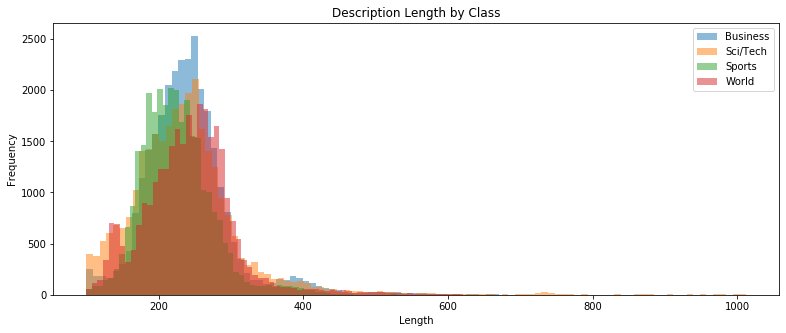

In [19]:
plt.figure(figsize=(13, 5))
for c in train_df.LABEL.unique():
    plt.hist(train_df[train_df["LABEL"] == c]["POST_LENGTH"], label=c, bins=100, alpha=0.5)
plt.legend()
plt.title("Description Length by Class")
plt.ylabel("Frequency")
plt.xlabel("Length")
save_image("desc_len")
plt.show()
plt.close()

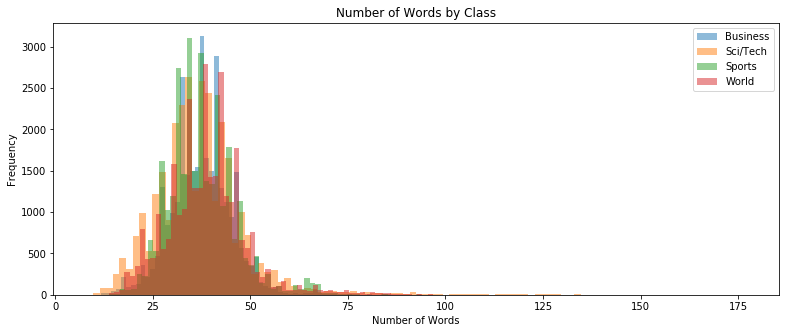

In [20]:
plt.figure(figsize=(13, 5))
for c in train_df.LABEL.unique():
    plt.hist(train_df[train_df["LABEL"] == c]["POST_NUM_WORDS"], label=c, bins=100, alpha=0.5)
plt.legend()
plt.title("Number of Words by Class")
plt.ylabel("Frequency")
plt.xlabel("Number of Words")
save_image("num_words")
plt.show()
plt.close()

## wordcloud

In [21]:
from wordcloud import WordCloud

In [22]:
concated_string = " ".join(train_df.POST)

In [23]:
def make_wordcloud(text, name=None):
    wordcloud = WordCloud(width=600, height=400, collocations=False).generate(text)
    plt.figure(figsize=(10,8), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    if name:
        save_image(name)
    plt.show()

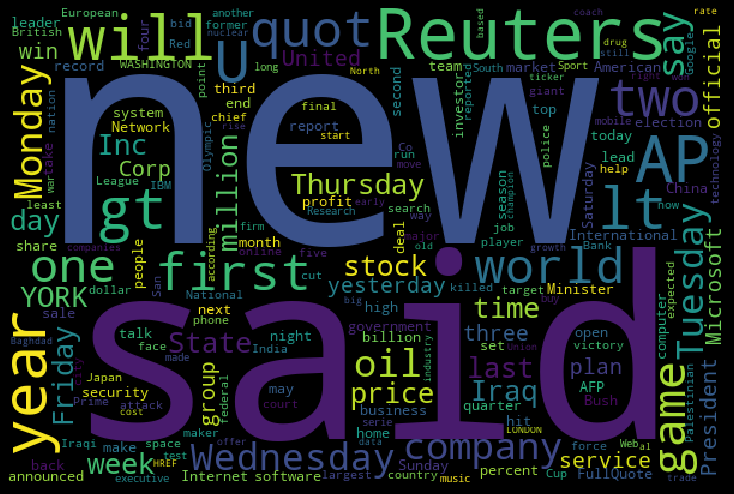

In [24]:
make_wordcloud(concated_string, "wordcloud")

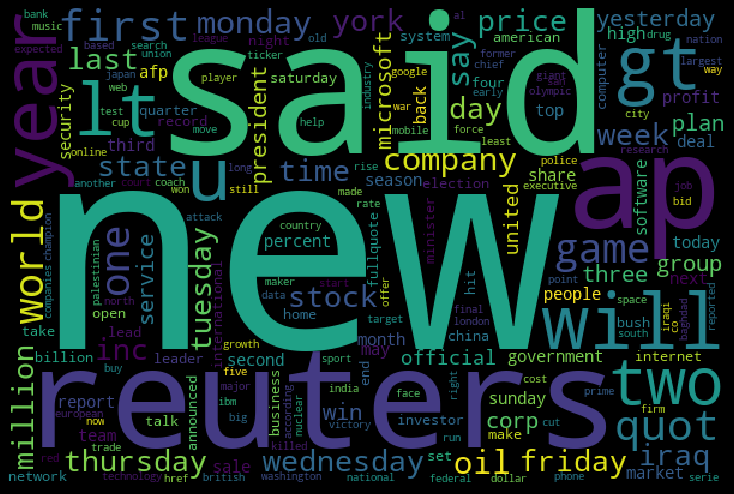

In [25]:
make_wordcloud(concated_string.lower(), "wordcloud_lower")

Business


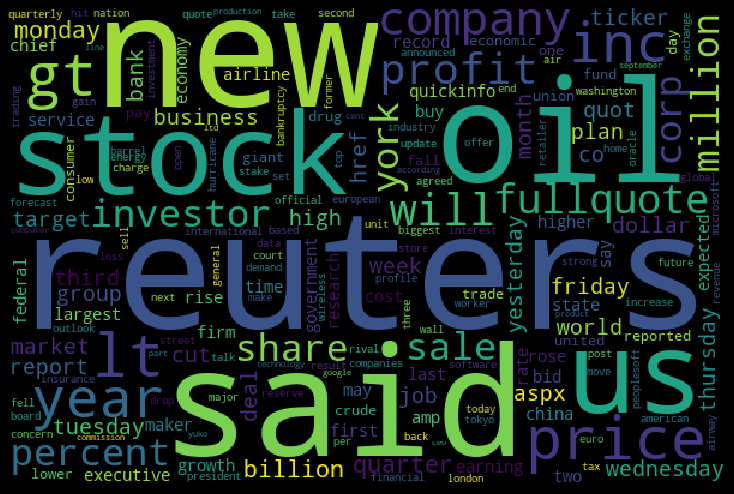


Sci/Tech


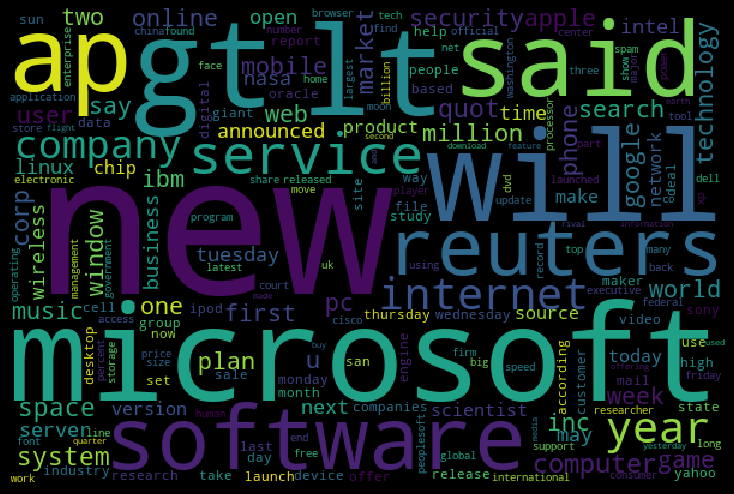


Sports


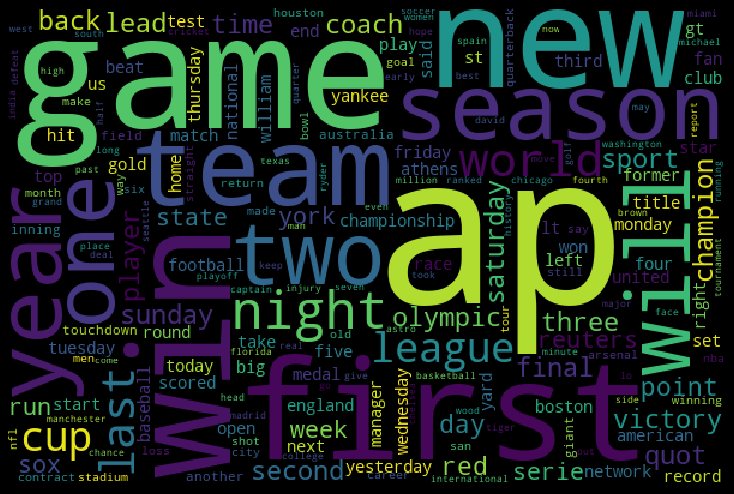


World


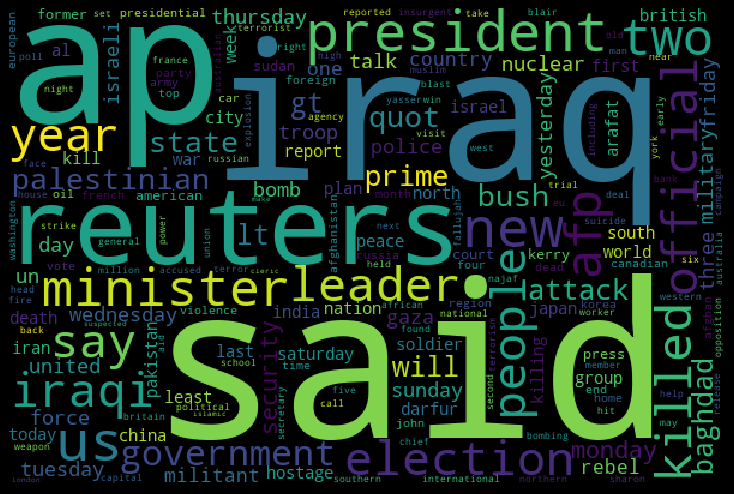

In [26]:
for categ in train_df["LABEL"].unique():
    print(categ)
    make_wordcloud(" ".join(train_df[train_df["LABEL"] == categ].POST).lower(), "wordcloud_{}".format(categ))
    print()

## Corpus exploration

In [27]:
import re

In [28]:
alnum = re.compile("[0-9a-zA-z]+")

In [29]:
from collections import Counter

def most_frequent_words(posts, top_k=10, stopwords=[], lower=False, alpha_num=False):
    cnts = {}
    for post in posts:
        if lower:
            post = post.lower()
            
        if alpha_num:
            post = " ".join(alnum.findall(post))
            
        tmp_cnt = Counter(post.split())        
        
        for word, count in tmp_cnt.items():    
            if word in stopwords:
                continue
                    
            if word in cnts:
                cnts[word] += count
            else:
                cnts[word] = count
    return sorted(cnts.items(), key=lambda tuple: tuple[1], reverse=True)[:top_k]

In [30]:
most_frequent_words(train_df["POST"])

[('the', 177529),
 ('to', 117605),
 ('a', 98112),
 ('of', 97395),
 ('in', 92055),
 ('and', 68046),
 ('on', 55156),
 ('for', 48430),
 ('-', 39105),
 ('#39;s', 30928)]

## stopwords

In [31]:
import nltk

In [32]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/sipan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
from nltk.corpus import stopwords

In [34]:
stopwords.words()

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [35]:
stops = stopwords.words("english")

In [40]:
import spacy
spacy_en = spacy.load("en")
stops_spacy = spacy.lang.en.stop_words.STOP_WORDS

In [41]:
len(stops), len(stops_spacy)

(179, 305)

In [42]:
[word for word in stops if word not in stops_spacy]

["you're",
 "you've",
 "you'll",
 "you'd",
 "she's",
 "it's",
 'theirs',
 "that'll",
 'having',
 's',
 't',
 'don',
 "don't",
 "should've",
 'd',
 'll',
 'm',
 'o',
 've',
 'y',
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]

In [43]:
[word for word in stops_spacy if word not in stops]

['could',
 'therefore',
 'latter',
 'seem',
 'mostly',
 'amongst',
 'must',
 'whereupon',
 'first',
 'last',
 'might',
 'within',
 'serious',
 'sixty',
 'thence',
 'eight',
 'without',
 'would',
 'done',
 'whereby',
 'across',
 'go',
 'never',
 'whole',
 'take',
 'bottom',
 'ever',
 'neither',
 'still',
 'throughout',
 'anything',
 'whence',
 'less',
 'three',
 'none',
 'whatever',
 'moreover',
 'something',
 'twelve',
 'name',
 'well',
 'anyway',
 'us',
 'onto',
 'many',
 'beside',
 'wherein',
 'seems',
 'whose',
 'back',
 'thus',
 'beyond',
 'thereupon',
 'four',
 'even',
 'somewhere',
 'ten',
 'five',
 'next',
 'forty',
 'hereupon',
 'sometimes',
 'quite',
 'together',
 'anyone',
 'side',
 'often',
 'various',
 'also',
 'enough',
 'except',
 'ca',
 'eleven',
 'one',
 'two',
 'whereafter',
 'whither',
 'every',
 'wherever',
 'get',
 'seemed',
 'sometime',
 'top',
 'mine',
 'herein',
 'third',
 'twenty',
 'unless',
 'amount',
 'nobody',
 'became',
 'behind',
 'perhaps',
 'whether',
 '

In [44]:
most_frequent_words(train_df["POST"], stopwords=stops)

[('-', 39105),
 ('#39;s', 30928),
 ('The', 25054),
 ('said', 16485),
 ('(Reuters)', 12798),
 ('US', 11545),
 ('new', 10228),
 ('A', 9174),
 ('(AP)', 8282),
 ('first', 8158)]

In [45]:
most_frequent_words(train_df["POST"], stopwords=stops, lower=True)

[('-', 39105),
 ('#39;s', 31129),
 ('new', 21047),
 ('said', 16613),
 ('(reuters)', 12811),
 ('us', 11846),
 ('first', 8898),
 ('two', 8836),
 ('(ap)', 8282),
 ('--', 7867)]

In [46]:
most_frequent_words(train_df["POST"], stopwords=stops, lower=True, alpha_num=True)

[('39', 44506),
 ('new', 21359),
 ('said', 20009),
 ('reuters', 19328),
 ('ap', 16276),
 ('gt', 13231),
 ('lt', 13182),
 ('us', 12893),
 ('\\', 11110),
 ('two', 10171)]

In [47]:
most_frequent_words(train_df["POST"][train_df.LABEL == "Sports"], stopwords=stops, lower=True, alpha_num=True)

[('39', 14826),
 ('ap', 6262),
 ('game', 4270),
 ('first', 4241),
 ('new', 4150),
 ('season', 3639),
 ('team', 3492),
 ('win', 3487),
 ('two', 3342),
 ('1', 3339)]

In [48]:
from pprint import pprint

In [49]:
for categ in train_df["LABEL"].unique():
    print(categ)
    pprint(most_frequent_words(train_df[train_df["LABEL"] == categ].POST, 10, stops, True))
    print()

Business
[('-', 9010),
 ('#39;s', 8939),
 ('said', 6655),
 ('new', 6505),
 ('oil', 6050),
 ('(reuters)', 5561),
 ('us', 5547),
 ('prices', 3727),
 ('inc.', 3551),
 ('company', 3302)]

Sci/Tech
[('-', 7853),
 ('new', 7015),
 ('#39;s', 6098),
 ('microsoft', 4567),
 ('said', 3219),
 ('software', 3143),
 ('internet', 2858),
 ('company', 2334),
 ('search', 2146),
 ('space', 2125)]

Sports
[('#39;s', 9508),
 ('-', 8728),
 ('new', 4088),
 ('first', 3853),
 ('win', 3237),
 ('ap', 3120),
 ('(ap)', 3095),
 ('game', 3077),
 ('world', 2854),
 ('team', 2816)]

World
[('-', 13514),
 ('#39;s', 6584),
 ('said', 5492),
 ('iraq', 4397),
 ('president', 3956),
 ('(reuters)', 3898),
 ('us', 3670),
 ('new', 3439),
 ('two', 3312),
 ('minister', 3101)]



In [50]:
def get_sample_with(expr, data=train_df["POST"], max_size=5, with_spaces=True):
    if with_spaces:
        found_data = [i for i in data if ' {} '.format(expr) in i]
    else:
        found_data = [i for i in data if expr in i]
    if len(found_data) == 0:
        print("no such examples")
    elif max_size >= len(found_data):
        for row in found_data:
            print(row, end="\n\n")
    else:
        for row in np.random.choice(found_data, max_size, False):
            print(row, end="\n\n")        

In [51]:
get_sample_with("#39;s")

Zurich employees plead guilty in insurance probe Two employees at insurance company Zurich American pleaded guilty on Tuesday to misdemeanors related to New York Attorney General Eliot Spitzer #39;s investigation of bid-rigging in the insurance market, according to a New York 

Sweden to Boost Infrastructure for Saab The government on Tuesday moved to bolster Saab Automobile AB #39;s lure to parent General Motors by agreeing to use state money to improve road and rail access to the company #39;s last automotive plant in Sweden.

(Sports Network) - Very quietly, the Philadelphia Phillies have &lt;b&gt;...&lt;/b&gt; are ahead of Larry Bowa #39;s team in the chase for the wild card. The Phillies. have 19 games to play, including 12 against teams with under-.

Update 1: UK Proposes Debt Relief for Poor Nations Britain will provide more debt relief for the world #39;s poorest countries and challenge other rich governments to do the same, Prime Minister Tony Blair #39;s government said Sunda

In [52]:
get_sample_with("&lt;a")

Google fixes Gmail hijacking flaw &lt;a href="http://www.newsfactor.com/story.xhtml?story_title=Gmail-Security-Flaw-Discovered story_id=28040 category=ecommerce"&gt;Gmail Security Flaw Discovered&lt;/a&gt; &lt;font size=-1 color=#6f6f6f&gt;&lt;nobr&gt;NewsFactor Network&lt;/nobr&gt;

No Frills, but Everything Else Is on Craigslist A freewheeling Internet marketplace, &lt;a href="http://www.craigslist.org"&gt;www.craigslist.org&lt;/a&gt; fulfills its users' varied needs. &lt;FONT face="verdana,MS Sans Serif,arial,helvetica" size="-2" color="#666666"&gt;&lt;B&gt;-Leslie Walker&lt;/B&gt;&lt;/FONT&gt;

SD in the cards for Nokia &lt;a href="http://p2pnet.net/story/2429"&gt;Nokia takes up SD cards&lt;/a&gt; &lt;font size=-1 color=#6f6f6f&gt;&lt;nobr&gt;p2pnet.net&lt;/nobr&gt;

Nokia overcomes SD Card phobia &lt;a href="http://www.technewsworld.com/story/Nokia-Adopts-SD-Card-Tech-into-Storage-Portfolio-36603.html"&gt;Nokia Adopts SD Card Tech into Storage Portfolio&lt;/a&gt; &lt;font size=-1 

In [53]:
mask = train_df["POST"].str.contains("&lt;")
mask.sum()

5241

In [54]:
mask2 = train_df["POST"].str.contains('&lt;a href="')
mask2.sum()

62

In [55]:
mask3 = train_df["POST"].str.contains('&gt;')
mask3.sum()

5243

In [56]:
train_df["POST"][mask ^ mask2].iloc[0]

"HP: The Adaptive Enterprise that can't adapt &lt;strong&gt;Opinion&lt;/strong&gt; SAP hardly to blame"

In [57]:
train_df["POST"][mask3 ^ mask].iloc[0]

'Hidden Java Features \\\\Really cool blog post about hidden Java features.  These are little tricks that\\you forget about from time to time but that make life more pleasant.\\\\This is a good one:\\\\"Instance initializers -- I\'ve been exploiting these lately to abbreviate list\\initialization (in unit tests only):\\&gt;\\List triple = new ArrayList(3) \\&gt;\\   add("a"); add("b"); add("c"); \\&gt;\\;"\\\\I\'ve been using static code blocks but this looks like it might be a better\\trick.\\\\Example:\\\\"public static List = new ArrayList();\\&gt;\\static \\    list.add( "foo" );\\"\\\\Also this final Closure  hack seems pretty cool:\\\\'

# Text Pre-processing

## capitalization

In [58]:
words = ["Canada", "CanadA", "CANADA", "tomcat", "Tomcat", "toMcat"]

In [59]:
for word in words:
    print("{} -> {} or {}".format(word, word.lower(), word.upper()))

Canada -> canada or CANADA
CanadA -> canada or CANADA
CANADA -> canada or CANADA
tomcat -> tomcat or TOMCAT
Tomcat -> tomcat or TOMCAT
toMcat -> tomcat or TOMCAT


## normalization

In [60]:
def normalize(text):
    text = text.replace("#39;", "'")
    text = text.replace("&lt;", "<")
    text = text.replace("&gt;", ">")
    
    return text

In [61]:
# or 
def normalize(text):
    text = text.replace("#39;", "'").replace("&lt;", "<").replace("&gt;", ">")
    
    return text

In [62]:
# might be useful for some corpuses
from unidecode import unidecode # needs to be installed
texts = ["C'est la première fois que deux équipes @", "водка", u"北亰"]
for text in texts:
    print("{} -> {}".format(text, unidecode(text)))

C'est la première fois que deux équipes @ -> C'est la premiere fois que deux equipes @
водка -> vodka
北亰 -> Bei Jing 


## punctuation removal

In [63]:
from string import punctuation

In [64]:
punctuation = set(punctuation)

In [65]:
len(punctuation)

32

In [66]:
punctuation

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [67]:
def remove_punctuation(text):
    chars = "".join([char if char not in punctuation else " " for char in text ]) 
    return " ".join(chars.split())

In [68]:
# or with regex
def remove_punctuation2(text):
    return " ".join(alnum.findall(text))

In [96]:
np.random.seed(0)
sample = print_sample(return_sample=True)

NEC launches world #39;s fastest supercomputer Japanese electronics giant NEC Corp has begun selling the world #39;s fastest supercomputer. NEC claimed its SX-8 is the most powerful  quot;vector-type quot; supercomputer, with a sustainable 
Label: Sci/Tech


In [97]:
remove_punctuation(sample)

'NEC launches world 39 s fastest supercomputer Japanese electronics giant NEC Corp has begun selling the world 39 s fastest supercomputer NEC claimed its SX 8 is the most powerful quot vector type quot supercomputer with a sustainable'

In [98]:
remove_punctuation2(sample)

'NEC launches world 39 s fastest supercomputer Japanese electronics giant NEC Corp has begun selling the world 39 s fastest supercomputer NEC claimed its SX 8 is the most powerful quot vector type quot supercomputer with a sustainable'

## Noise removal

In [84]:
noise = re.compile(r"\d+|\D+")

In [92]:
def remove_noise(text):
    text = remove_punctuation(text)
    text = " ".join([word for word in noise.findall(text)])
    return " ".join([word for word in text.split() if word.isalnum()])

In [99]:
sample

'NEC launches world #39;s fastest supercomputer Japanese electronics giant NEC Corp has begun selling the world #39;s fastest supercomputer. NEC claimed its SX-8 is the most powerful  quot;vector-type quot; supercomputer, with a sustainable '

In [100]:
remove_noise(sample)

'NEC launches world 39 s fastest supercomputer Japanese electronics giant NEC Corp has begun selling the world 39 s fastest supercomputer NEC claimed its SX 8 is the most powerful quot vector type quot supercomputer with a sustainable'

## Lemmatization

In [101]:
from nltk.stem import WordNetLemmatizer
space_en = spacy.load("en", disable=["ner", "parser", "tagger"])
nltk_lemmatizer = WordNetLemmatizer()

In [111]:
sample = "Buffett closing on Gates in rich list Forbes magazine has again ranked Bill Gates as the richest person in the worth to 48 but investor Warren Buffett has edged"

In [112]:
def lemmatize_nltk(text):
    tokens = text.split()
    lemmas = [nltk_lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmas)

In [113]:
def lemmatize_spacy(text):
    text = space_en(text)
    lemmas = [token.lemma_ for token in text]
    return " ".join(lemmas)

In [114]:
%%time
lemmatize_nltk(sample)

CPU times: user 755 µs, sys: 27 µs, total: 782 µs
Wall time: 795 µs


'Buffett closing on Gates in rich list Forbes magazine ha again ranked Bill Gates a the richest person in the worth to 48 but investor Warren Buffett ha edged'

In [115]:
%%time
lemmatize_spacy(sample)

CPU times: user 3.31 ms, sys: 0 ns, total: 3.31 ms
Wall time: 2.14 ms


'Buffett close on Gates in rich list Forbes magazine have again rank Bill Gates a the rich person in the worth to 48 but investor Warren Buffett have edge'

## Stemming

In [116]:
from nltk.stem import PorterStemmer, SnowballStemmer

In [117]:
porter = PorterStemmer()
snowball = SnowballStemmer("english")

In [118]:
sample_clean = remove_noise(sample)

In [119]:
words = remove_noise(sample_clean).split()

In [120]:
porter_stems = [porter.stem(token) for token in words]
snowball_stems = [snowball.stem(token) for token in words]

In [121]:
spacy_lemmas = lemmatize_spacy(sample_clean).split()
nltk_lemmas = lemmatize_nltk(sample_clean).split()

In [122]:
pd.DataFrame({"words": words, "porter": porter_stems, "snowball": snowball_stems, 
              "spacy lemma": spacy_lemmas, "nltk lemma": nltk_lemmas})

,words,porter,snowball,spacy lemma,nltk lemma
0,Buffett,buffett,buffett,Buffett,Buffett
1,closing,close,close,close,closing
2,on,on,on,on,on
3,Gates,gate,gate,Gates,Gates
4,in,in,in,in,in
5,rich,rich,rich,rich,rich
6,list,list,list,list,list
7,Forbes,forb,forb,Forbes,Forbes
8,magazine,magazin,magazin,magazine,magazine
9,has,ha,has,have,ha


## Stop-word removal (already discussed)

In [123]:
# you can convert numbers to their textual form
def process_number(string_number):
    number = int(string_number)
    if number < 10:
        return "LT10"
    if number < 100:
        return "LTH"
    if number < 1000:
        return "LTT"
    return "GTT"

In [126]:
def simple_cleaning(text):
    text = text.replace(" #39;", "")
    text = text.replace("&lt;", "<")
    text = text.replace("&gt;", ">")
    text = text.replace(",", "")
    text = "".join([char if char not in punctuation else " " for char in text])
    text = text.lower()
    text_words = text.split()
    text_words2 = []
    for word in text_words:
        text_words2.extend(noise.findall(word))
    text_words2 = [word for word in text_words2 if word not in stops]
    text_words2 = [word if not word.isnumeric() else process_number(word) for word in text_words2]
    return " ".join(text_words2)

In [124]:
sample = print_sample(return_sample=True)

PalmSource unveils Cobalt OS PalmSource finally unveiled its new OS, version 1.1 of Palm OS Cobalt, as  quot;the first PalmOS designed specifically to support phones quot;.
Label: Sci/Tech


In [127]:
simple_cleaning(sample)

'palmsource unveils cobalt os palmsource finally unveiled new os version LT10 LT10 palm os cobalt quot first palmos designed specifically support phones quot'

In [128]:
data_raw = train_df["POST"]

In [129]:
data_processed = data_raw.map(lambda text: simple_cleaning(text))

In [130]:
for categ in train_df["LABEL"].unique():
    categ_mask = train_df["LABEL"] == categ
    print(categ)
    needed_part = data_processed[categ_mask]
    print(round(needed_part.str.contains(" LT10 ").sum()/len(needed_part), 2), 
          round(needed_part.str.contains(" LTH ").sum()/len(needed_part), 2),
          round(needed_part.str.contains(" LTT ").sum()/len(needed_part), 2),
          round(needed_part.str.contains(" GTT ").sum()/len(needed_part), 2), end="\n\n")

Business
0.25 0.25 0.09 0.1

Sci/Tech
0.18 0.17 0.06 0.13

Sports
0.26 0.29 0.08 0.09

World
0.08 0.2 0.06 0.07



In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train_raw, X_val_raw, y_train, y_val = train_test_split(data_raw, train_df["LABEL"], 
                                                          test_size=len(test_df), random_state = 17, 
                                                          stratify = train_df["LABEL"])
X_train_raw = np.array(X_train_raw)
X_val_raw = np.array(X_val_raw)
y_train = np.array(y_train)
y_val = np.array(y_val)

print(X_train_raw.shape, X_val_raw.shape)

(112400,) (7600,)


In [133]:
X_train_pr, X_val_pr, y_train, y_val = train_test_split(data_processed, train_df["LABEL"], 
                                                        test_size=len(test_df), random_state = 17, 
                                                        stratify = train_df["LABEL"])
X_train_pr = np.array(X_train_pr)
X_val_pr = np.array(X_val_pr)
y_train = np.array(y_train)
y_val = np.array(y_val)

print(X_train_pr.shape, X_val_pr.shape)

(112400,) (7600,)


In [134]:
# from fasttext import train_supervised
from fastText import train_supervised

In [135]:
def to_fasttext_format(data: list, labels: list, save_path: str=None):
    ft_data = []
    for text, label in zip(data, labels):
        ft_data.append("__label__{} {}".format(label, text))
    if save_path:
        with open(save_path, "w+") as outfile:
            outfile.write("\n".join(ft_data))
    else:
        return ft_data

In [136]:
to_fasttext_format(X_train_raw, y_train, "train_raw.txt")
to_fasttext_format(X_val_raw, y_val, "val_raw.txt")

In [137]:
to_fasttext_format(X_train_pr, y_train, "train_proc.txt")
to_fasttext_format(X_val_pr, y_val, "val_proc.txt")

In [219]:
from tqdm import tqdm

In [ ]:
# no random sandom seed in fasttext

In [220]:
def evaluate(train_data_path, val_data_path, k=9):
    scores, models = [], []
    
    for _ in tqdm(range(k)):
        model = train_supervised(train_data_path, loss="ns", minCount=5)
        scores.append(model.test(val_data_path)[-1])
        models.append(model)
    args = np.argsort(scores)
    median_index = args[len(args)//2]
    return scores[median_index], models[median_index]

In [221]:
score1, model1 = evaluate("train_raw.txt", "val_raw.txt")

100%|██████████| 9/9 [00:23<00:00,  2.59s/it]


In [222]:
score2, model2 = evaluate("train_proc.txt", "val_proc.txt")

100%|██████████| 9/9 [00:19<00:00,  2.20s/it]


In [225]:
score1, score2

(0.9181578947368421, 0.915921052631579)

In [226]:
len(model1.get_words()), len(model2.get_words())

(44700, 26472)

In [227]:
m1_words = set(model1.get_words())
m2_words = set(model2.get_words())

In [228]:
[i for i in m1_words if i not in m2_words]

['Va.',
 'Printing',
 'Passengers',
 'Tack',
 'Acknowledges',
 'stability,',
 'Pete',
 '\\$100,000',
 'Mixed;',
 'Acquiring',
 'full-service',
 'three-pointers,',
 'one-time',
 'Scramble',
 'tournaments.',
 'Post-Election',
 'Piracy',
 'nuclear-armed',
 'missing.',
 'Settles',
 'Sector',
 'Branch',
 '180,',
 'NHL,',
 'Yoran',
 'Hartson',
 'hoped,',
 'Kay',
 'TDs,',
 'crowd.',
 'happen.',
 '77',
 'Search:',
 'Sources:',
 'Oasis',
 'Kind',
 'Greg',
 'sports.',
 'Certainly',
 'rights-infringement',
 "carrier's",
 'delivery,',
 'year-ago',
 'WASHINGTON:',
 'Johannes',
 'Hosoda',
 'ConocoPhillips',
 'Sonic',
 'Diabetes',
 'Wily',
 'States-led',
 'changed.',
 'acquisition,',
 'Trafford.',
 'quot;City',
 'Researchers',
 'Ants',
 "Congress'",
 '5.6',
 'Photo).',
 '\\$316',
 'MLB',
 'Soviet-style',
 'Bhupathi',
 'Nastech',
 'Compete',
 '20-0',
 'Fly',
 "Congo's",
 'Again.',
 'Rendell',
 'Aires',
 'Adultery',
 'rains,',
 'Kick',
 'Computers,',
 'OPPOSITION',
 '1999.',
 'orders,',
 'Week,',
 'cou

In [230]:
[i for i in m2_words if i not in m1_words]

['peppers',
 'nascars',
 'org',
 'fpl',
 'safm',
 'tsoumeleka',
 'englanders',
 'alienating',
 'menino',
 'villalba',
 'amgen',
 'pilbara',
 'immucor',
 'dmb',
 'romano',
 'infractions',
 'huawei',
 'imperfect',
 'beslan',
 'damarcus',
 'redefining',
 'stepfather',
 'overcapacity',
 'pakistani',
 'sothebys',
 'porcher',
 'attributes',
 'sci',
 'athlon',
 'ronaldinho',
 'kilogram',
 'dvds',
 'jaap',
 'jiabao',
 'mariners',
 'juliet',
 'castor',
 'maktoum',
 'janjaweed',
 'setters',
 'rommedahl',
 'herbal',
 'isotopes',
 'magics',
 'kyocera',
 'intl',
 'stockholm',
 'aspirin',
 'kirchner',
 'phillips',
 'reshuffling',
 'submission',
 'merriam',
 'unfettered',
 'wolong',
 'ledee',
 'terps',
 'peres',
 'militarys',
 'chapel',
 'sydney',
 'lowes',
 'heartbeats',
 'lama',
 'nigerias',
 'recreation',
 'tuesdays',
 'muzaffarabad',
 'opecs',
 'abraham',
 'denominated',
 'najaf',
 'southtrust',
 'refreshing',
 'lyne',
 'kane',
 'bingham',
 'palestine',
 'breeders',
 'conocophillips',
 'indianas'

In [268]:
import sys
sys.path.append("./fasttext-tensorflow/")

In [269]:
import fasttext_model

In [278]:
ft_model = fasttext_model.train_supervised('./train_raw.txt', './val_raw.txt', 
                            hyperparams={"learning_rate": 0.07, "n_epochs": 3, "l2_reg_weight": 1e-5, 
                                         "min_word_count": 5,
                                        "batch_size": 8096, "batch_size_inference": 8096})

training with arguments:
Namespace(batch_norm=0, batch_size=8096, batch_size_inference=8096, cache_dir='/home/sipan/projects/mine/DSSS19/cache', data_fraction=1.0, dim=100, dropout=0.5, flush=1, force=0, gpu_fraction=0.5, l2_reg_weight=1e-05, label_prefix='__label__', learning_rate=0.07, learning_rate_multiplier=0.8, min_label_count=1, min_word_count=5, n_epochs=3, result_dir='/home/sipan/projects/mine/DSSS19/results', save_models=0, seed=17, sort_ngrams=0, top_k=5, train_path='/home/sipan/projects/mine/DSSS19/train_raw.txt', use_gpu=0, use_validation=1, validation_path='./val_raw.txt', word_ngrams=1)


training hyper-parameters hashed: 89795d36327059dc6b17396827da4ddc
preparing dataset
total number of datapoints: 112400
max number of words in description: 178
max number of words with n-grams in description: 179
100%|██████████| 112400/112400 [00:05<00:00, 22095.67it/s]

Creating train vocabulary ...
Read 4.3m words and phrases
Number of unique words and phrases: 181816
number of uniqu

In [279]:
ft_model.test_file("./train_raw.txt")

100%|██████████| 1124/1124 [00:08<00:00, 131.17it/s]


(112400, 0.92796, 0.92796)

In [280]:
ft_model.test_file("./val_raw.txt")

100%|██████████| 76/76 [00:00<00:00, 132.21it/s]


(7600, 0.89789, 0.89789)

In [281]:
ft_model2 = fasttext_model.train_supervised('./train_proc.txt', './val_proc.txt', 
                            hyperparams={"learning_rate": 0.07, "n_epochs": 3, "l2_reg_weight": 1e-5, 
                                         "min_word_count": 5,
                                        "batch_size": 8096, "batch_size_inference": 8096})

training with arguments:
Namespace(batch_norm=0, batch_size=8096, batch_size_inference=8096, cache_dir='/home/sipan/projects/mine/DSSS19/cache', data_fraction=1.0, dim=100, dropout=0.5, flush=1, force=0, gpu_fraction=0.5, l2_reg_weight=1e-05, label_prefix='__label__', learning_rate=0.07, learning_rate_multiplier=0.8, min_label_count=1, min_word_count=5, n_epochs=3, result_dir='/home/sipan/projects/mine/DSSS19/results', save_models=0, seed=17, sort_ngrams=0, top_k=5, train_path='/home/sipan/projects/mine/DSSS19/train_proc.txt', use_gpu=0, use_validation=1, validation_path='./val_proc.txt', word_ngrams=1)


training hyper-parameters hashed: cab03de38722596b497d374597ddb821
preparing dataset
total number of datapoints: 112400
max number of words in description: 182
max number of words with n-grams in description: 183
100%|██████████| 112400/112400 [00:04<00:00, 23976.25it/s]

Creating train vocabulary ...
Read 4.4m words and phrases
Number of unique words and phrases: 62372
number of uniq

In [282]:
ft_model2.test_file("./train_proc.txt")

100%|██████████| 1124/1124 [00:08<00:00, 128.08it/s]


(112400, 0.92253, 0.92253)

In [283]:
ft_model2.test_file("./val_proc.txt")

100%|██████████| 76/76 [00:00<00:00, 120.76it/s]


(7600, 0.90237, 0.90237)

In [69]:
%%time
train_supervised("train_raw.txt", loss="ns", minCount=1)

CPU times: user 10.1 s, sys: 112 ms, total: 10.2 s
Wall time: 3.95 s


In [70]:
from itertools import product

In [71]:
%%time
model1.test("val_raw.txt")

CPU times: user 104 ms, sys: 0 ns, total: 104 ms
Wall time: 105 ms


(7600, 0.9172368421052631, 0.9172368421052631)

In [72]:
from tqdm import tqdm, tqdm_notebook

In [73]:
to_fasttext_format(X_train_raw, y_train, "train_raw.txt")
to_fasttext_format(X_val_raw, y_val, "val_raw.txt")

In [74]:
len(y_val)

7600

In [115]:
indieces = np.random.choice(np.arange(len(X_train_pr)), size=7*len(X_val_pr), replace=False)
sample_train = [X_train_pr[i] for i in indieces]
sample_train_labels = [y_train[i] for i in indieces]
to_fasttext_format(sample_train, sample_train_labels, "train_sample1.txt")

In [116]:
Counter(sample_train_labels)

Counter({'Sports': 13333,
         'World': 13256,
         'Business': 13358,
         'Sci/Tech': 13253})

In [82]:
def hyperparameter_grid_search(minCounts=[1, 10],
                              wordNgrams = [1, 2],
                              minns=[0, 3],
                              maxns=[0, 3, 4],
                              lrs=[0.3, 0.1, 0.05],
                              dims=[50, 100, 200],
                              epochs=[3, 5, 7],
                              losses=["hs", "ns", "softmax", "ova"]):
    p = list(product(minCounts, wordNgrams, minns, maxns, lrs, dims, epochs, losses))
    pbar = tqdm_notebook(total=len(p))
    best_score, best_model, best_params = -1, None, None
    for min_count, wng, minn, maxn, lr, dim, ep, l in p:
        params = {"minCount": min_count, "wordNgrams":wng, "minn": minn, "maxn": maxn,
                              "lr":lr, "dim": dim, "epoch": ep, "loss": l}
        if minn > maxn:
            pbar.update()
            continue
        if (minn == 0) and (maxn!=0):
            pbar.update()
            continue

        model = train_supervised("train_sample1.txt", minCount=min_count, wordNgrams=wng, minn=minn, maxn=maxn,
                                 loss=l, dim=dim, epoch=ep)
        score = model.test("val_proc.txt")[-1]
        pbar.update()
        if score > best_score:
            best_score = score
            best_params = params
            best_model = model
            
    return best_score, best_params, best_model
        
    #-minCount
    #-wordNgrams
    #-minn
    #-maxn
    #-lr
    #-lrUpdataRate
    #-dim
    #-epoch
    #-loss

In [140]:
def hyperparameter_grid_search_small(minCounts=[1, 5, 10],
                                     wordNgrams = [1, 2],
                                    lrs=[0.5, 0.3, 0.1],
                                    k=5):
    history = []
    p = list(product(minCounts, wordNgrams, lrs))
    pbar = tqdm_notebook(total=len(p))
    best_score, best_model, best_params = -1, None, None
    for min_count, wng, lr in p:
        params = {"minCount": min_count, "wordNgrams":wng, "lr": lr}
#         if minn > maxn:
#             pbar.update()
#             continue
#         if (minn == 0) and (maxn!=0):
#             pbar.update()
#             continue
        score = 0
        for _ in range(k):
            model = train_supervised("train_sample1.txt", minCount=min_count, wordNgrams=wng, loss="ova", lr=lr)
            score += model.test("val_proc.txt")[-1]
        score = score/k
        pbar.update()
        if score > best_score:
            best_score = score
            best_params = params
            best_model = model
        params["score"] = score
        history.append(params)
            
    return best_score, best_params, best_model, history
        
    #-minCount
    #-wordNgrams
    #-minn
    #-maxn
    #-lr
    #-lrUpdataRate
    #-dim
    #-epoch
    #-loss

In [141]:
# hyperparameter_grid_search()

In [145]:
res = hyperparameter_grid_search_small()

In [146]:
res1 = pd.DataFrame(res[-1]).sort_values("score", ascending=False)

In [147]:
res1

,lr,minCount,score,wordNgrams
4,0.3,1,0.914605,2
10,0.3,5,0.914211,2
11,0.1,5,0.913868,2
5,0.1,1,0.913816,2
17,0.1,10,0.913658,2
16,0.3,10,0.913237,2
9,0.5,5,0.913184,2
3,0.5,1,0.913132,2
15,0.5,10,0.912684,2
2,0.1,1,0.907895,1


In [105]:
res1[(res1.minn == 0)].groupby("loss")["score"].mean()

loss
hs         0.891118
ns         0.898783
ova        0.899309
softmax    0.895888
Name: score, dtype: float64

In [104]:
res1[(res1.minn == 0) & (res1.minCount==1)].groupby("loss")["score"].mean()

loss
hs         0.891053
ns         0.899276
ova        0.900197
softmax    0.896382
Name: score, dtype: float64

In [99]:
res1[res1.maxn == 4].groupby("loss")["score"].mean()

loss
hs         0.838322
ns         0.879375
ova        0.870296
softmax    0.867961
Name: score, dtype: float64

In [102]:
res1[res1.minCount == 1].groupby("loss")["score"].mean()

loss
hs         0.859649
ns         0.886996
ova        0.881732
softmax    0.878004
Name: score, dtype: float64

In [69]:
import fasttext

In [70]:
unsup_ft = fasttext.train_unsupervised("./train_raw.txt")

In [84]:
import numpy as np

In [87]:
np.sqrt(np.sum(np.square(unsup_ft.get_word_vector("abcd") - unsup_ft.get_word_vector("abce"))))

1.3175017

In [88]:
np.sqrt(np.sum(np.square(unsup_ft.get_word_vector("dell") - unsup_ft.get_word_vector("abce"))))

3.3750553

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (8,6), fontsize=10):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')